<a href="https://colab.research.google.com/github/AsmaaMohamedIsmail/The-Sparks-Foundation-solution-/blob/main/Task_3_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asmaa Mohamed Ismail

## The sparks Foundation internship 

### Task3: Exploratory Data Analysis on Dataset "Sample Super store"

In [ ]:
# importing libraries:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

### Importing the Dataset :

In [ ]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Exploration:

In [ ]:
df.shape

(9994, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Note:
- **There isn't null values in the Dataset**

In [ ]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
df.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

### Data Preprocessing:

In [ ]:
# duplicated values:
df.duplicated().sum()

17

In [ ]:
# delete duplicated values:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(9977, 13)

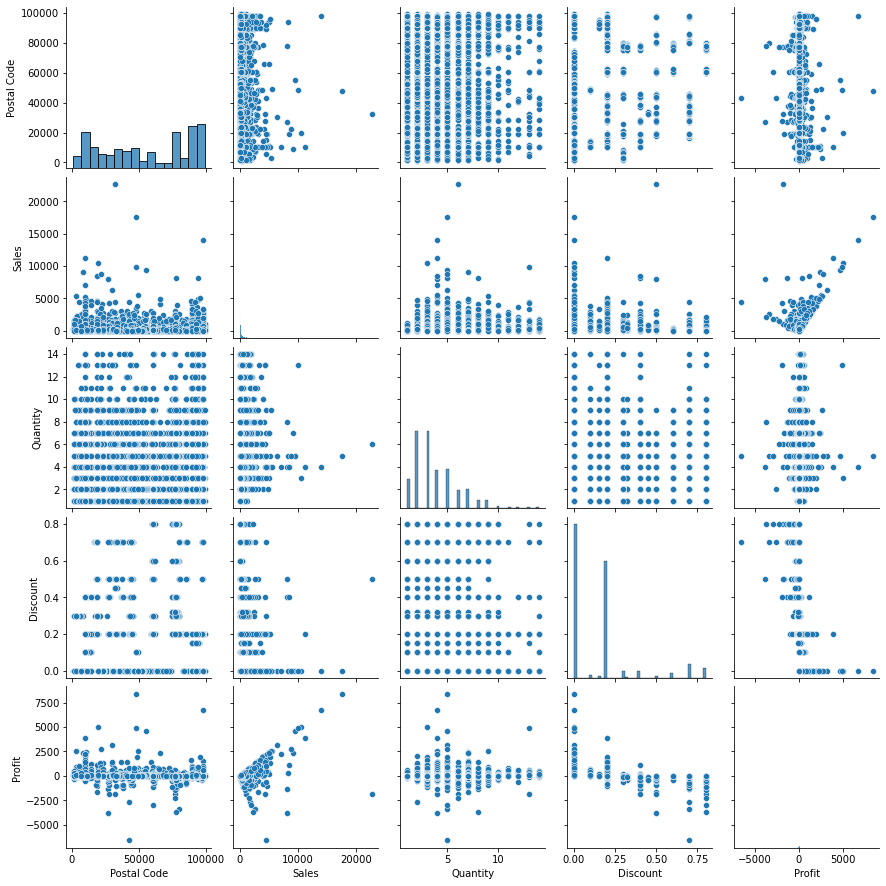

In [ ]:
# relationship between each pair in the dataset:
sns.pairplot(df)

### Note:
- **Profit increases when Sales increases (positive relationship)**

- **Profit decreases when discount increases (negative relationship)**

<AxesSubplot:>

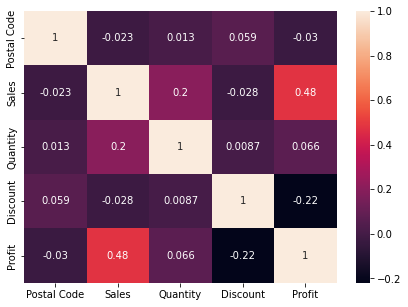

In [ ]:
corr = df.corr()
plt.figure(figsize = (7,5))
sns.heatmap(corr, annot = True)

### **From the heatmap we observe that:**

- **Most correlation is between sales and profit, so we need to maximize sales to maximize the profit**

## Ship Mode:

<AxesSubplot:>

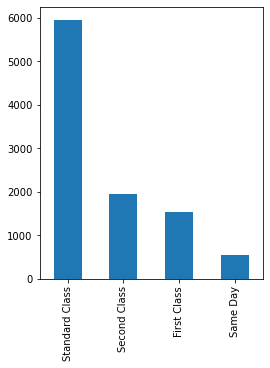

In [ ]:
# Ship Mode:
df["Ship Mode"].value_counts().plot(kind='bar', figsize=(4,5))

### **From this figure we see that:**

- **Most Ship Mode is Standard Class**

- **Least Ship Mode is Same Day**

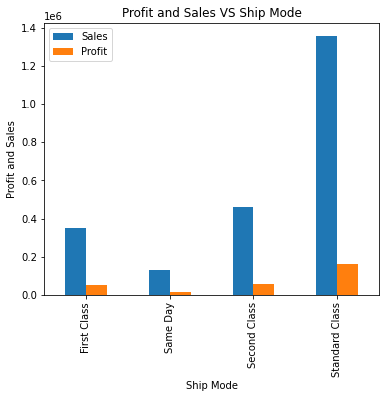

In [ ]:
df.groupby('Ship Mode')[['Sales','Profit']].sum().round(2).plot(kind = "bar", figsize = (6,5))
plt.title("Profit and Sales VS Ship Mode")
plt.ylabel("Profit and Sales")
plt.show()

### From this figure we observe :
- **Maximum Profit and Sales : Standard Class**
- **Minimum Profit and Sales : Same Day**

## Segment:

<AxesSubplot:>

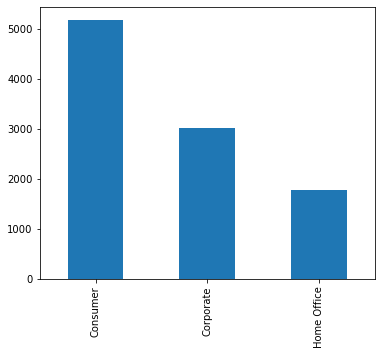

In [ ]:
# Segment:
df['Segment'].value_counts().plot(kind='bar', figsize=(6,5))

### **From this graph we Note:**
- **Most Segment is the Consumer segment**
- **Least Segment is Home Office segment**

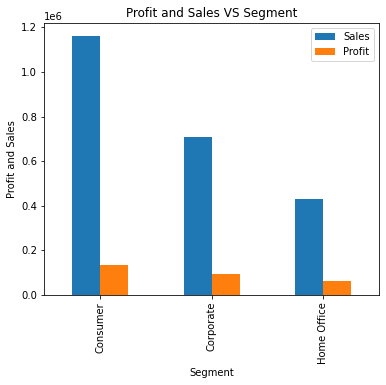

In [ ]:
df.groupby("Segment")[["Sales","Profit"]].sum().plot(kind = "bar", figsize = (6,5))
plt.title("Profit and Sales VS Segment")
plt.ylabel("Profit and Sales")
plt.show()

### **From this graph we Note:**
- **Maximum Sales and Profit in Consumer segment**
- **Minmum Sales and Profit in Home Office segment**

## State:

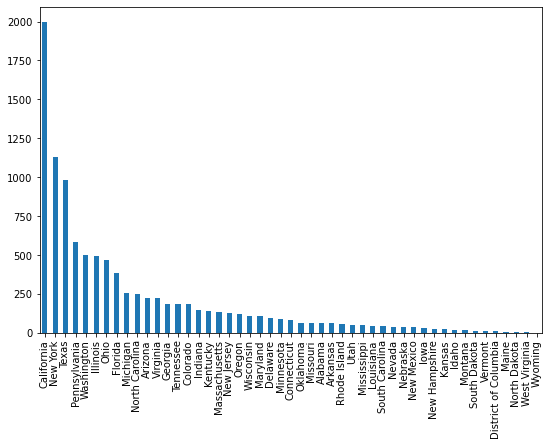

In [ ]:
# State:
df['State'].value_counts().plot(kind="bar", figsize=(9,6))
plt.show()

### **From this graph we Note:**
- **Most buyers are from California**
- **Least buyrs are from wyoming**

In [ ]:
state=df.groupby("State")[["Sales","Profit"]].sum()
state

,Sales,Profit
State,,
Alabama,19510.6400,5786.8253
Arizona,35282.0010,-3427.9246
Arkansas,11678.1300,4008.6871
California,457576.2715,76330.7891
Colorado,32108.1180,-6527.8579
Connecticut,13384.3570,3511.4918
Delaware,27451.0690,9977.3748
District of Columbia,2865.0200,1059.5893
Florida,89473.7080,-3399.3017


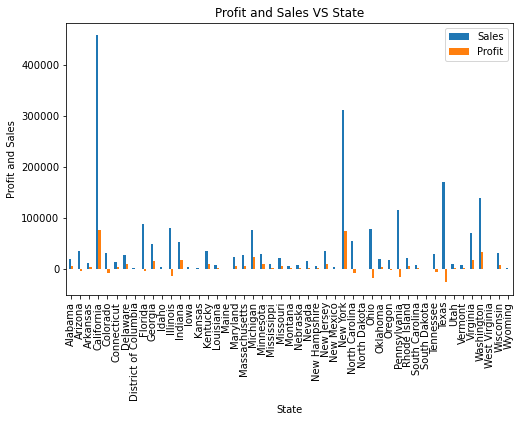

In [ ]:
state.plot(kind='bar',figsize=(8,5))
plt.title("Profit and Sales VS State")
plt.ylabel("Profit and Sales")
plt.show()

### From this graph we Note:
- **Maximum profit and sales in California**
- **Minimum Profit and Sales in Texas, Ohie, pennsylvania, Illinois and Colorado**

## Region :

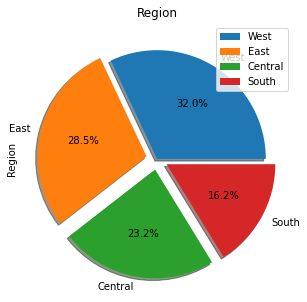

In [ ]:
df['Region'].value_counts().plot(kind='pie',figsize=(6,5),shadow=True,explode = [0,0.1,0.1,0.1],autopct="%1.1f%%")
plt.title("Region")
plt.legend(labels=df['Region'].value_counts().index, loc="upper right")
plt.show()

### From this graph we Note:
- **The most of company deals in the west**
- **The least of company deals in south**

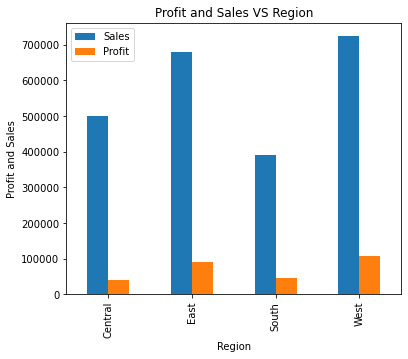

In [ ]:
df.groupby("Region")[["Sales","Profit"]].sum().plot(kind='bar',figsize=(6,5))
plt.title("Profit and Sales VS Region")
plt.ylabel("Profit and Sales")
plt.show()

### **From this graph we Note:**
- **Maximum Sales and Profit from west**
- **Minmum Sales and Profit from South**

## Category :

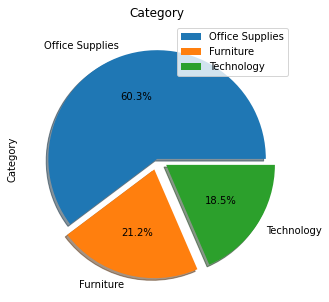

In [ ]:
df['Category'].value_counts().plot(kind='pie',figsize=(7,5),shadow=True,explode = [0,0.1,0.1],autopct="%1.1f%%")
plt.title("Category")
plt.legend(labels=df['Category'].value_counts().index, loc="upper right")
plt.show()

## From this graph we Note:
- **The most distribution of the business is in Office Supplies**
- **The least distribution of the business is in Technology**

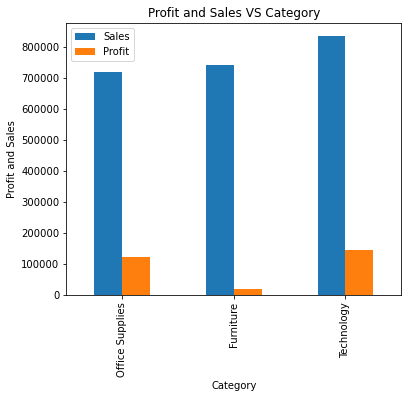

In [ ]:
df.groupby("Category")[["Sales","Profit"]].sum().sort_values(by=["Sales","Profit"]).plot(kind='bar',figsize=(6,5))
plt.title("Profit and Sales VS Category")
plt.ylabel("Profit and Sales")
plt.show()

## From this graph we Note:
- **Maximum Profit and Sales in Technoloy category**
- **Minimum Profit and Sales in Office Supplies category**

## Sub-Category :

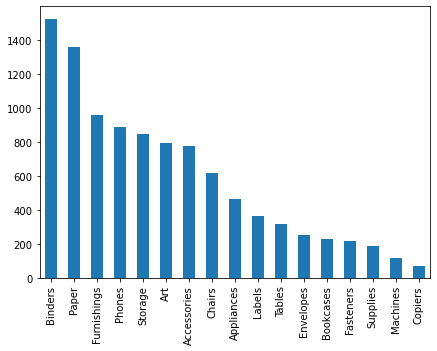

In [ ]:
df["Sub-Category"].value_counts().plot(kind='bar',figsize=(7,5))
plt.show()

## From this graph we Note:
- **Most distribution of business is in Binders**
- **Least distribution of business is in Copiers**

In [ ]:
sub_category=df.groupby("Sub-Category")[["Sales","Profit"]].sum().sort_values(by=["Sales","Profit"])
sub_category.round(2)

,Sales,Profit
Sub-Category,,
Fasteners,3024.28,949.52
Labels,12444.91,5526.38
Envelopes,16476.40,6964.18
Art,27107.03,6524.61
Supplies,46673.54,-1189.10
Paper,78224.14,33944.24
Furnishings,91683.02,13052.72
Appliances,107532.16,18138.01
Bookcases,114880.00,-3472.56


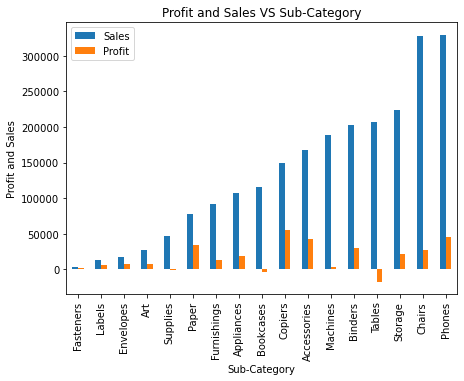

In [ ]:
sub_category.plot(kind='bar',figsize=(7,5))
plt.title("Profit and Sales VS Sub-Category")
plt.ylabel("Profit and Sales")
plt.show()

## **From this graph we Note:**
- **Maximum Sales and Profit in Phoes**
- **Minimum Sales and Profit in fasteners**

## The relation between Discount and profit :

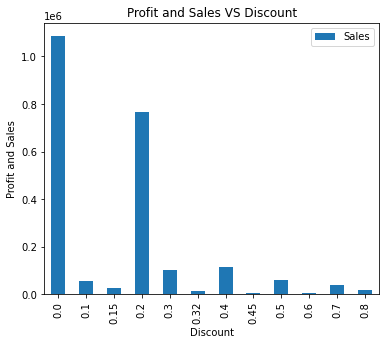

In [ ]:
df.groupby("Discount")[["Sales"]].sum().plot(kind='bar',figsize=(6,5))
plt.title("Profit and Sales VS Discount")
plt.ylabel("Profit and Sales")
plt.show()

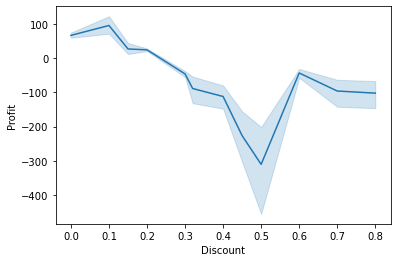

In [ ]:
sns.lineplot(df["Discount"],df["Profit"])
plt.show()

## Note:
- **Profit and Discount have negative relation**

## Thanks